In [1]:
%matplotlib inline

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Let us show some of the training images, for fun.



plane   car  ship   car


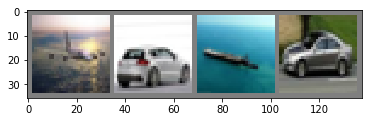

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [5]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 16, 3, padding=1)
        self.conv3 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv4 = nn.Conv2d(32, 32, 3, padding=1)
        
        self.pool = nn.MaxPool2d(2, 2)
        
        # we pool three times, padding takes care of dividing accurately
        # so the final images are 32 channels wide, of dims 4x4
        self.fc1 = nn.Linear(32 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.pool(x)
        
        x = x.view(-1, 32 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        
        return x


net = Net()

net.cuda()

Net (
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (fc1): Linear (512 -> 256)
  (fc2): Linear (256 -> 10)
)

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=1e-3, weight_decay=1e-4)

In [7]:
for epoch in range(30):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.027
[1,  4000] loss: 1.756
[1,  6000] loss: 1.626
[1,  8000] loss: 1.531
[1, 10000] loss: 1.485
[1, 12000] loss: 1.416
[2,  2000] loss: 1.370
[2,  4000] loss: 1.318
[2,  6000] loss: 1.306
[2,  8000] loss: 1.305
[2, 10000] loss: 1.297
[2, 12000] loss: 1.261
[3,  2000] loss: 1.223
[3,  4000] loss: 1.209
[3,  6000] loss: 1.192
[3,  8000] loss: 1.188
[3, 10000] loss: 1.188
[3, 12000] loss: 1.203
[4,  2000] loss: 1.113
[4,  4000] loss: 1.153
[4,  6000] loss: 1.136
[4,  8000] loss: 1.113
[4, 10000] loss: 1.137
[4, 12000] loss: 1.126
[5,  2000] loss: 1.055
[5,  4000] loss: 1.069
[5,  6000] loss: 1.068
[5,  8000] loss: 1.075
[5, 10000] loss: 1.058
[5, 12000] loss: 1.075
[6,  2000] loss: 1.016
[6,  4000] loss: 1.019
[6,  6000] loss: 1.037
[6,  8000] loss: 1.033
[6, 10000] loss: 1.014
[6, 12000] loss: 1.024
[7,  2000] loss: 0.949
[7,  4000] loss: 0.977
[7,  6000] loss: 0.986
[7,  8000] loss: 0.975
[7, 10000] loss: 1.014
[7, 12000] loss: 0.970
[8,  2000] loss: 0.922
[8,  4000] 

GroundTruth:    cat  ship  ship plane


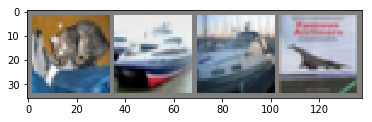

In [8]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [9]:
outputs = net(Variable(images.cuda()))

In [10]:
_, predicted = torch.max(outputs.data, 1)

print(outputs.data)
print(predicted)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))



Columns 0 to 7 
-11.0642 -11.4798 -11.3822  -6.1689 -11.8836  -7.9655 -11.4851 -12.2119
-12.8397 -12.8710 -20.0301 -23.3054 -21.4160 -25.7146 -21.3303 -27.0867
-10.4224  -8.7471 -13.3357 -13.5951 -15.4455 -15.3020 -14.5112 -17.0522
 -8.3093 -11.9432 -13.3813 -17.8520 -14.8934 -19.5695 -15.7637 -19.1427

Columns 8 to 9 
 -9.3388 -10.8983
 -8.4014 -15.7781
 -8.0355  -9.6712
 -9.6589 -13.2200
[torch.cuda.FloatTensor of size 4x10 (GPU 0)]


 3
 8
 8
 0
[torch.cuda.LongTensor of size 4 (GPU 0)]

Predicted:    cat  ship  ship plane


In [11]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images.cuda()))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted.cpu() == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 68 %


In [12]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images.cuda()))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted.cpu() == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 68 %
Accuracy of   car : 92 %
Accuracy of  bird : 64 %
Accuracy of   cat : 50 %
Accuracy of  deer : 67 %
Accuracy of   dog : 53 %
Accuracy of  frog : 67 %
Accuracy of horse : 65 %
Accuracy of  ship : 79 %
Accuracy of truck : 75 %
